In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
import colormaps as cmaps
import os
import scipy as sp
from scipy.ndimage.interpolation import rotate
from magpie_data import PolarimetryMap2, FaradayMap2, NeLMap2, Interferogram, OpticalFrames
import scipy.constants as c
from mcerp import N, umath, Gamma
from bdots import *
import pickle

# Faraday Rotation
[s0405_16](#s0405_16)

In [2]:
%cd "~\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat"
if_bk=rotate(plt.imread("s0513_15 IR side on interferometry t255ns.JPG"),4)
if_sh=rotate(plt.imread("s0513_15 IR side on interferometry (1).JPG"),4)
far_bk1=plt.imread("s0513_15/13-May-2015 16_19_03_1355463638.png")
far_bk2=plt.imread("s0513_15/13-May-2015 16_19_03_2211629970.png")
far_sh1=np.fliplr(plt.imread("s0513_15/13-May-2015 17_00_09_1355463638_fliplr.png"))
far_sh2=plt.imread("s0513_15/13-May-2015 17_00_09_2211629970.png")

C:\Users\jdhare\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat


<IPython.core.display.Javascript object>


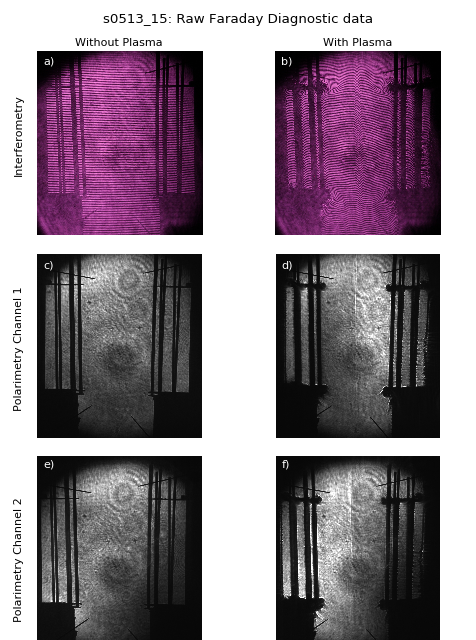

In [3]:
fig, ax=plt.subplots(3,2, figsize=(5.96,8), frameon=False)
a=ax[0,0]
a.imshow(np.rot90(if_bk[400:3300,1200:3800],2))
a.set_title("Without Plasma", fontsize=10)
a=ax[0,1]
a.imshow(np.rot90(if_sh[400:3300,1200:3800],2))
a.set_title("With Plasma", fontsize=10)

a=ax[1,0]
a.imshow(np.flipud(far_bk1[300:2100,900:2500]), cmap='gray', clim=[0,0.2])

a=ax[1,1]
a.imshow(np.flipud(far_sh1[300:2100,900:2500]), cmap='gray', clim=[0,0.2])

a=ax[2,0]
a.imshow(np.flipud(far_bk2[400:2200,900:2500]), cmap='gray', clim=[0,0.2])

a=ax[2,1]
a.imshow(np.flipud(far_sh2[400:2200,900:2500]), cmap='gray', clim=[0,0.2])


plt.subplots_adjust(left=0, bottom=0, right=1, top=0.92,
                wspace=0.0, hspace=0.1)

fig.suptitle("s0513_15: Raw Faraday Diagnostic data", fontsize=12)

for a in ax.flat:
    a.axis('off')
    
fig.text(0.03, 0.84,"Interferometry", fontsize=10,rotation='vertical')
fig.text(0.03, 0.54,"Polarimetry Channel 1", fontsize=10,rotation='vertical')
fig.text(0.03, 0.21,"Polarimetry Channel 2", fontsize=10,rotation='vertical')

fig.text(0.09, 0.9,"a)", fontsize=10, color='white')
fig.text(0.59, 0.9,"b)", fontsize=10, color='white')
fig.text(0.09, 0.58,"c)", fontsize=10, color='white')
fig.text(0.59, 0.58,"d)", fontsize=10, color='white')
fig.text(0.09, 0.27,"e)", fontsize=10, color='white')
fig.text(0.59, 0.27,"f)", fontsize=10, color='white')

In [ ]:
th_folder=r'~\Google Drive\MAGPIE\thesis\images'
fn='chapter5_s0513_15_raw_faraday.pdf'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=400)

### Processed Faraday for s0513_15

In [4]:
%cd "~\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat\s0513_15"
B0fn="13-May-2015 16_39_56_1355463638_fliplr.png"
B1fn="13-May-2015 16_39_56_2211629970.png"
S0fn="13-May-2015 17_00_09_1355463638_fliplr.png"
S1fn="13-May-2015 17_00_09_2211629970.png"
s0513_15_pol=PolarimetryMap2(B0fn, B1fn, B0fn, B1fn, S0fn, S1fn)
s=s0513_15_pol

C:\Users\jdhare\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat\s0513_15


In [5]:
t=pickle.load(open( "s0513_16 faraday registration.txt", "rb" ))
s.register(transform=t)

C:\Users\jdhare\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [6]:
s.convert_to_alpha()
s.scale=67
s.set_origin([1255,1682], extent=[-13,13,-6,6])

In [7]:
%cd "~\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat"
s0513_15_far=FaradayMap2(s0513_15_pol,"s0513_15 IR side on image registration flipud.jpg", "s0513_15 neL side on.txt", flip_ne=True)

C:\Users\jdhare\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat


C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:200: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  I0zc=I0z[:,crop:-crop]
C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:204: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.I1zc=I1z[:,crop:-crop]


In [8]:
f=s0513_15_far
t=pickle.load(open('s0513_15 interferometry transform.txt', 'rb'))
f.register(transform=t)

C:\Users\jdhare\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:214: RuntimeWarning: divide by zero encountered in true_divide
  self.data=5.99e18*self.pm.data/self.I1T
C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:214: RuntimeWarning: overflow encountered in true_divide
  self.data=5.99e18*self.pm.data/self.I1T
C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:214: RuntimeWarning: invalid value encountered in true_divide
  self.data=5.99e18*self.pm.data/self.I1T


In [9]:
f.scale=s.scale
f.set_origin(s.origin, extent=[-13,13,-6,6])

In [11]:
s0513_15_ne=NeLMap2('s0513_15 neL side on.txt', scale=s.scale) 

In [12]:
ne=s0513_15_ne
ne.data=f.I1T
ne.scale=s.scale
ne.set_origin(origin=s.origin, extent=[-13,13,-6,6])

In [13]:
b_map=f.data_c.copy()
b_map[b_map>100]=0
b_map[b_map<-100]=0

<IPython.core.display.Javascript object>


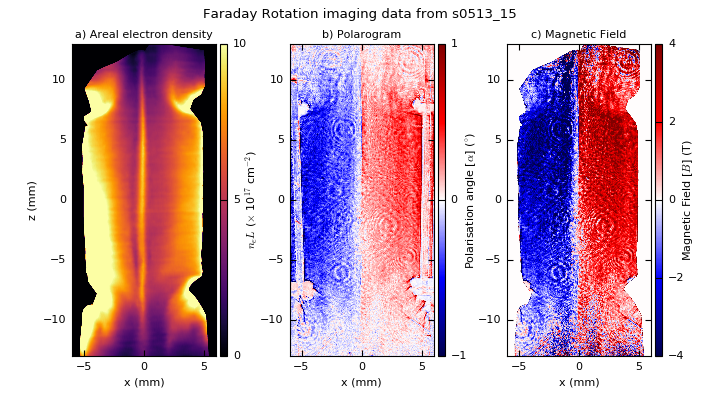

In [14]:
fig, ax=plt.subplots(1,3, figsize=(9,5))
ne_im=ax[0].imshow(np.flipud(ne.data_c/1e17), extent=s.extent, clim=[0,10], cmap=cmaps.cmaps['inferno'], aspect=1)
pol_im=ax[1].imshow(np.flipud(s.data_c), extent=s.extent, clim=[-1,1], cmap='seismic')

mag_im=ax[2].imshow(np.flipud(b_map), extent=f.extent, clim=[-4,4], cmap='seismic')
#f.plot_data_mm(ax=ax[2], clim=[-4,4])

#labels and ticks
for a in ax:
    a.set_xlabel('x (mm)',fontsize=10)
    a.set_xticks([-5,0,5])
    a.tick_params(labelsize=10, pad=5, length=5, width=1)
ax[0].set_ylabel('z (mm)',fontsize=10)
ax[0].set_title('a) Areal electron density', fontsize=10)
ax[1].set_title('b) Polarogram', fontsize=10)
ax[2].set_title('c) Magnetic Field', fontsize=10)

#set up the colourbar
divider0 = make_axes_locatable(ax[0])
cbar_ax0 = divider0.append_axes("right", size="5%", pad=0.05)
c=cbar_ax0
fig.colorbar(ne_im, cax=c, ticks=[0,5,10])
c.set_ylabel(r'$n_e L$ ($\times$ 10$^{17}$ cm$^{-2}$)',fontsize=10, labelpad=-3)


divider1 = make_axes_locatable(ax[1])
cbar_ax1 = divider1.append_axes("right", size="5%", pad=0.05)
c=cbar_ax1
fig.colorbar(pol_im, cax=c, ticks=[-1,0,1])
c.set_ylabel(r'Polarisation angle [$\alpha$] ($^{\circ}$)',fontsize=10, labelpad=-3)

divider2 = make_axes_locatable(ax[2])
cbar_ax2 = divider2.append_axes("right", size="5%", pad=0.05)
c=cbar_ax2
fig.colorbar(mag_im, cax=c, ticks=[-4, -2,0,2,4])
c.set_ylabel(r'Magnetic Field [$B$] (T)',fontsize=10, labelpad=-3)


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.92, top=0.9,
                wspace=0.4, hspace=0.1)

#colour bars
for c in [cbar_ax0,cbar_ax1,cbar_ax2]:
    c.tick_params(labelsize=10, pad=5, length=6, width=1)
    
fig.suptitle("Faraday Rotation imaging data from s0513_15", fontsize=12)

In [ ]:
th_folder=r'~\Google Drive\MAGPIE\thesis\images'
fn='chapter5_s0513_15_faraday_data.pdf'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=400)

## Lineouts from s0513_15 Faraday

(871, 134) (871, 670)
(871, 134) (871, 670)


<IPython.core.display.Javascript object>


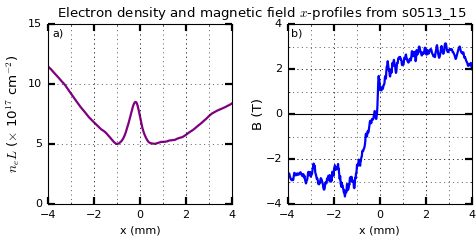

In [15]:
xx=4
zz=0 #note the the data files are flipped ud wrt to the images, so think about the sign here!
lw=2*s.scale

f.create_lineout(start=(zz,-xx), end=(zz, xx), lineout_width=lw)
ne.create_lineout(start=(zz,-xx), end=(zz, xx), lineout_width=lw)


fig, ax=plt.subplots(1,2, figsize=(5.96,3), sharex=True)

ax[0].plot(ne.mm, ne.lo/1e17, lw=2, c='purple')
ax[1].plot([-10,10],[0,0], c='black')
ax[1].plot(f.mm, f.lo, lw=2, c='blue')

for a in ax:
    a.tick_params(labelsize=10, pad=5, length=6, width=2)
    a.grid(True)
    a.set_xlabel("x (mm)", fontsize=10)
    a.set_xlim([-4,4])
    a.set_xticks([-4,-2,0,2,4])
    a.xaxis.set_minor_locator(MultipleLocator(1))
    a.grid(which='minor')

    
ax[0].set_ylabel(r'$n_e L$ ($\times$ 10$^{17}$ cm$^{-2}$)')
ax[0].set_yticks([0,5,10, 15])
ax[1].set_ylabel(r'B (T)', labelpad=0)
ax[1].set_yticks([-4,-2,0,2,4])
ax[1].set_ylim([-4,4])

ax[1].yaxis.set_minor_locator(MultipleLocator(1))

fig.subplots_adjust(left=0.1, bottom=0.15, right=0.99, top=0.9,
                wspace=0.3, hspace=0.1)

fig.suptitle(r'Electron density and magnetic field $x$-profiles from s0513_15', fontsize=12, x=0.55)

fig.text(0.11, 0.85,"a)", fontsize=10)
fig.text(0.61, 0.85,"b)", fontsize=10)

In [ ]:
th_folder=r'~\Google Drive\MAGPIE\thesis\images'
fn='chapter5_s0513_15_faraday_horizontal_lineouts.pdf'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=400)

(469, 201) (1273, 201)
(469, 201) (1273, 201)


<IPython.core.display.Javascript object>


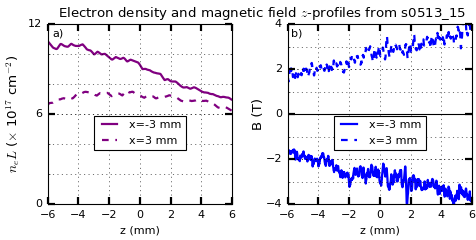

(469, 603) (1273, 603)
(469, 603) (1273, 603)


In [16]:
xx=-3
zz=6
lw=1*s.scale

f.create_lineout(start=(zz,xx), end=(-zz, xx), lineout_width=lw)
ne.create_lineout(start=(zz,xx), end=(-zz, xx), lineout_width=lw)

fig, ax=plt.subplots(1,2, figsize=(5.96,3), sharex=True)

ax[0].plot(ne.mm, ne.lo/1e17, lw=2, c='purple', label='x='+str(xx)+' mm')
ax[1].plot([-10,10],[0,0], c='black')
ax[1].plot(f.mm, f.lo, lw=2, c='blue',label='x='+str(xx)+' mm')

xx=3

f.create_lineout(start=(zz,xx), end=(-zz, xx), lineout_width=lw)
ne.create_lineout(start=(zz,xx), end=(-zz, xx), lineout_width=lw)

ax[0].plot(ne.mm, ne.lo/1e17, lw=2, c='purple', label='x='+str(xx)+' mm', ls='--')
ax[1].plot(f.mm, f.lo, lw=2, c='blue',label='x='+str(xx)+' mm', ls='--')


for a in ax:
    a.tick_params(labelsize=10, pad=5, length=6, width=2)
    a.grid(True)
    a.set_xlabel("z (mm)", fontsize=10)
    a.set_xlim([-6,6])
    a.set_xticks([-6,-4,-2,0,2,4,6])
    
ax[0].set_ylabel(r'$n_e L$ ($\times$ 10$^{17}$ cm$^{-2}$)')
ax[0].set_yticks([0,6,12])
ax[1].set_ylabel(r'B (T)', labelpad=0)
ax[1].set_yticks([-4,-2,0,2,4])
ax[1].set_ylim([-4,4])

ax[0].yaxis.set_minor_locator(MultipleLocator(2))
ax[0].grid(which='minor')


ax[1].yaxis.set_minor_locator(MultipleLocator(1))
ax[1].grid(which='minor')

ax[0].legend(fontsize=10, loc=(0.25,0.3))
ax[1].legend(fontsize=10, loc=(0.25,0.3))


fig.subplots_adjust(left=0.1, bottom=0.15, right=0.99, top=0.9,
                wspace=0.3, hspace=0.1)

fig.suptitle('Electron density and magnetic field $z$-profiles from s0513_15', fontsize=12, x=0.55)


fig.text(0.11, 0.85,"a)", fontsize=10)
fig.text(0.61, 0.85,"b)", fontsize=10)

In [ ]:
th_folder=r'~\Google Drive\MAGPIE\thesis\images'
fn='chapter5_s0513_15_faraday_vertical_lineouts.pdf'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=400)

# s0405_16
<a id='s0405_16'></a>

In [4]:
%cd "~\Google Drive\MAGPIE\data\2016\s0405_16 C RECONNECTION FARADAY\s0405_16 Faraday"

C:\Users\jdhare\Google Drive\MAGPIE\data\2016\s0405_16 C RECONNECTION FARADAY\s0405_16 Faraday


In [5]:
R0fn="s0405_16_142841_c1.png"
R1fn="s0405_16_142841_c2.png"
B0fn="s0405_16_143858_c1.png"
B1fn="s0405_16_143858_c2.png"
S0fn="s0405_16_145359_c1.png"
S1fn="s0405_16_145359_c2.png"
s0405_16_pol=PolarimetryMap2(R0fn, R1fn, B0fn, B1fn, S0fn, S1fn, rot_angle=-2.5)
s=s0405_16_pol

In [6]:
#constraints={'angle':(0,0.1),'scale':(1,0.01),'tx':(-350,20),'ty':(-15,10)}
t=pickle.load(open( "s0405_16 faraday registration.txt", "rb" ))
s.register(transform=t)
s.convert_to_alpha()

C:\Users\jdhare\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:144: RuntimeWarning: invalid value encountered in true_divide
  self.N0=self.S0/self.B0
C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:145: RuntimeWarning: invalid value encountered in true_divide
  self.N1=self.ST/self.BT


In [7]:
s.scale=58
s.set_origin((1277,1602), extent=[-13,13,-6,6])
#s.plot_data_mm(clim=[-2,2])

<IPython.core.display.Javascript object>


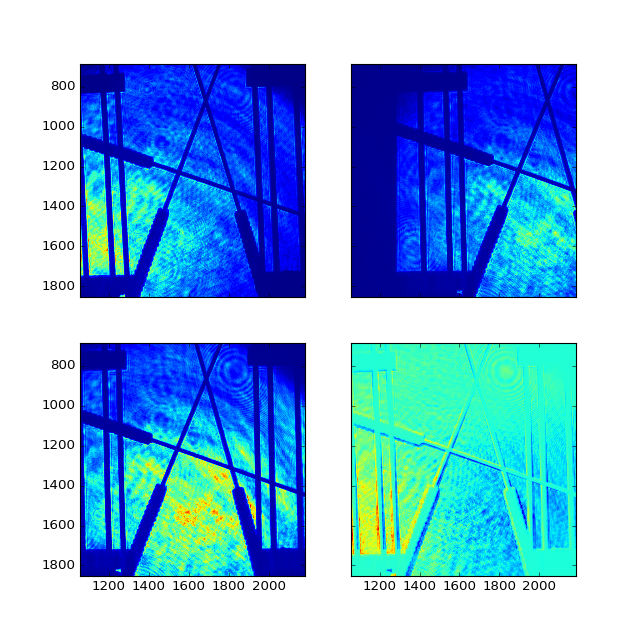

In [47]:
fig,ax=plt.subplots(2,2,figsize=(8,8),sharex=True, sharey=True)
ax[0,0].imshow(s.R0)
ax[0,1].imshow(s.R1)
ax[1,0].imshow(s.RT)
ax[1,1].imshow(s.R0-s.RT)

In [8]:
%cd "~\Google Drive\MAGPIE\data\2016\s0405_16 C RECONNECTION FARADAY"
I0="s0405_16 IR side on interferometry (4).JPG"
ne="s0405_16 side on neL.txt"
s0405_16_far=FaradayMap2(s, I0, ne)
f=s0405_16_far

C:\Users\jdhare\Google Drive\MAGPIE\data\2016\s0405_16 C RECONNECTION FARADAY


C:\Users\jdhare\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:200: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  I0zc=I0z[:,crop:-crop]
C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:204: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.I1zc=I1z[:,crop:-crop]


In [10]:
#constraints={'angle':(0,0.2),'scale':(0.7,0.1),'tx':(-90,20),'ty':(140,40)}
f.I1zc=np.flipud(f.I1zc)
#t=pickle.load(open('s0405_16 interferometry registration.txt', 'rb'))
f.register(constraints=constraints)

ValueError: Images must have same shapes.

In [12]:
f.I0zcn.shape, f.pm.R0.shape

((2673, 3462), (2673, 3461))

In [70]:
f.pickle_transform('s0405_16 interferometry registration.txt')

In [82]:
f.scale=s.scale
f.set_origin(s.origin, extent=[-13,13,-6,6])

In [83]:
s0405_16_ne=NeLMap2('s0405_16 side on neL.txt', scale=s.scale) 

In [84]:
ne=s0405_16_ne
ne.data=f.I1T
ne.scale=s.scale
ne.set_origin(origin=s.origin, extent=[-13,13,-6,6])

In [85]:
b_map=f.data_c.copy()
b_map[b_map>100]=0
b_map[b_map<-100]=0

<IPython.core.display.Javascript object>


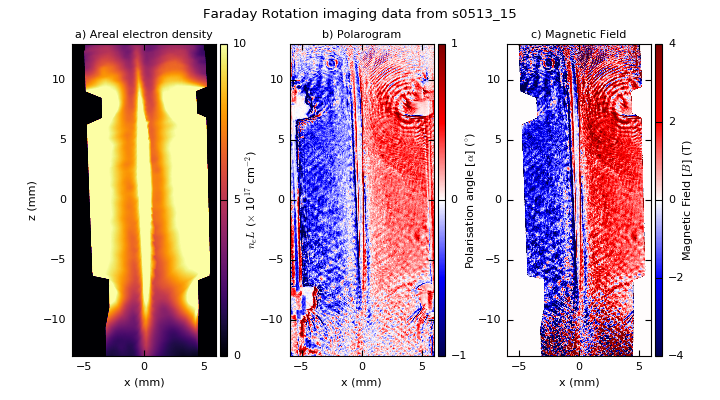

In [86]:
fig, ax=plt.subplots(1,3, figsize=(9,5))
ne_im=ax[0].imshow(ne.data_c/1e17, extent=s.extent, clim=[0,10], cmap=cmaps.cmaps['inferno'], aspect=1)
pol_im=ax[1].imshow(s.data_c, extent=s.extent, clim=[-1,1], cmap='seismic')

mag_im=ax[2].imshow(b_map, extent=f.extent, clim=[-4,4], cmap='seismic')
#f.plot_data_mm(ax=ax[2], clim=[-4,4])

#labels and ticks
for a in ax:
    a.set_xlabel('x (mm)',fontsize=10)
    a.set_xticks([-5,0,5])
    a.tick_params(labelsize=10, pad=5, length=5, width=1)
ax[0].set_ylabel('z (mm)',fontsize=10)
ax[0].set_title('a) Areal electron density', fontsize=10)
ax[1].set_title('b) Polarogram', fontsize=10)
ax[2].set_title('c) Magnetic Field', fontsize=10)

#set up the colourbar
divider0 = make_axes_locatable(ax[0])
cbar_ax0 = divider0.append_axes("right", size="5%", pad=0.05)
c=cbar_ax0
fig.colorbar(ne_im, cax=c, ticks=[0,5,10])
c.set_ylabel(r'$n_e L$ ($\times$ 10$^{17}$ cm$^{-2}$)',fontsize=10, labelpad=-3)


divider1 = make_axes_locatable(ax[1])
cbar_ax1 = divider1.append_axes("right", size="5%", pad=0.05)
c=cbar_ax1
fig.colorbar(pol_im, cax=c, ticks=[-1,0,1])
c.set_ylabel(r'Polarisation angle [$\alpha$] ($^{\circ}$)',fontsize=10, labelpad=-3)

divider2 = make_axes_locatable(ax[2])
cbar_ax2 = divider2.append_axes("right", size="5%", pad=0.05)
c=cbar_ax2
fig.colorbar(mag_im, cax=c, ticks=[-4, -2,0,2,4])
c.set_ylabel(r'Magnetic Field [$B$] (T)',fontsize=10, labelpad=-3)


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.92, top=0.9,
                wspace=0.4, hspace=0.1)

#colour bars
for c in [cbar_ax0,cbar_ax1,cbar_ax2]:
    c.tick_params(labelsize=10, pad=5, length=6, width=1)
    
fig.suptitle("Faraday Rotation imaging data from s0513_15", fontsize=12)

# s0825_16

In [2]:
1

1

In [3]:
%cd "~\Google Drive\MAGPIE\data\2016\s0825_16 Reconnection C TS\s0825_16 Faraday"
R0fn="s0825_16_105815_c1.png"
R1fn="s0825_16_105828_c2.png"
B0fn="s0825_16_111237_c1.png"
B1fn="s0825_16_111251_c2.png"
S0fn="s0825_16_112836_c1.png"
S1fn="s0825_16_112850_c2.png"
s0825_16_pol=PolarimetryMap2(B0fn, B1fn, B0fn, B1fn, S0fn, S1fn, rot_angle=-0.8)
s=s0825_16_pol

C:\Users\jdhare\Google Drive\MAGPIE\data\2016\s0825_16 Reconnection C TS\s0825_16 Faraday


In [ ]:
constraints={'angle':(0,0.1),'scale':(1,0.01),'tx':(0,100),'ty':(0,100)}
s.register(constraints=constraints)
s.convert_to_alpha()

<IPython.core.display.Javascript object>


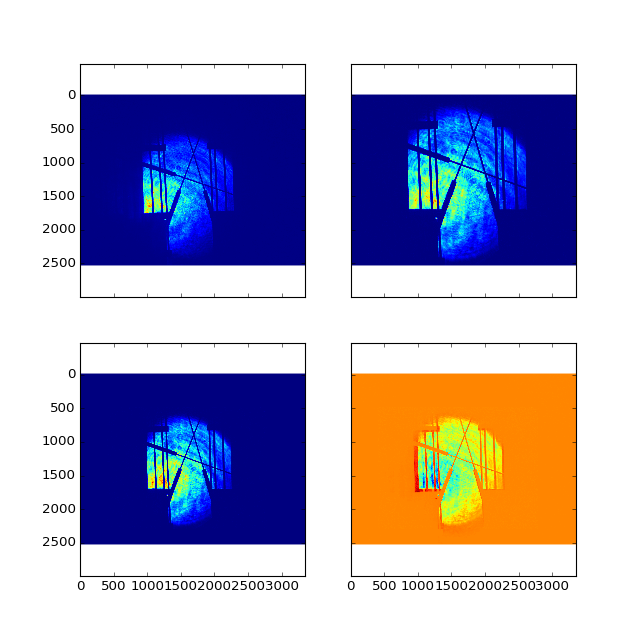

In [69]:
fig,ax=plt.subplots(2,2,figsize=(8,8),sharex=True, sharey=True)
ax[0,0].imshow(s.R0)
ax[0,1].imshow(f.I0zcn)
ax[1,0].imshow(f.I0T)
ax[1,1].imshow(s.R0-f.I0T)

In [ ]:
g